In [14]:
import numpy as np
import umap.umap_ as umap
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN


/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [20]:
import sys
sys.path.append("/nobackup/gogandhi/alt_means_sans_k/")
from scripts.nets_and_embeddings import *

In [57]:
params = {
    "N": 1000,
    "k": 50,
    "maxk": 1000,
    "minc": 50,
    "maxc": 100, #maxc > maxk and minc > mink has to be satisfied.
    "tau": 3.0,
    "tau2": 1.0,
    "mu": 0.20,
}

emb_params = {
    "method": "node2vec",
    "window_length": 10,
    "walk_length": 80,
    "num_walks": 10,
    "dim": 64,
}

net, community_table, emb = create_and_save_network_and_embedding(params, emb_params, path_name=None, save_file=False)
print(len(set(community_table['community_id'])))

3


/nobackup/gogandhi/miniconda3/envs/kmeans_env/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


[1, 2, 3]


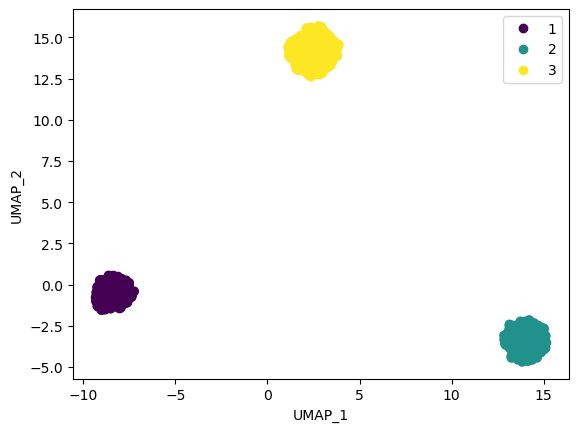

In [58]:
def umap_plot(data, clusters):
    embedding = umap.UMAP(random_state=42).fit_transform(data)

    s = plt.scatter(embedding[:, 0], embedding[:, 1], c = clusters, cmap = 'viridis')
    plt.xlabel('UMAP_1')
    plt.ylabel('UMAP_2')
    plt.legend(s.legend_elements()[0], list(set(clusters)))
    print(list(set(clusters)))
    #plt.title('UMAP clustering of 4406 cells', fontsize=20)
    plt.show()
    return

umap_plot(emb, community_table['community_id'])

In [48]:
len(set(community_table['community_id']))

28